# Assignment on Classification

# 1. Read the dataset to python environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the data
data=pd.read_excel("IrisAssign.xls")

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do the necessary pre-processing steps

In [5]:
data.shape

(150, 5)

In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [73]:
#identify missing values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
data["SL"].nunique()

35

In [12]:
data["SL"]

0      5.1
1      4.9
2      NaN
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SL, Length: 150, dtype: float64

In [13]:
#Fill the missing values

In [16]:
SL_med=data["SL"].median()
data["SL"]=data["SL"].fillna(SL_med)
PL_med=data["PL"].median()
data["PL"]=data["PL"].fillna(PL_med)
SW_med=data["SW"].median()
data["SW"]=data["SW"].fillna(SW_med)

In [17]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


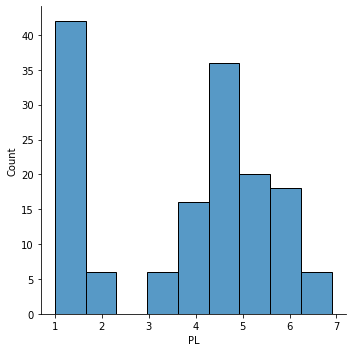

In [30]:
#Outlier detection using visualisation
sns.displot(data['PL'])
plt.show()

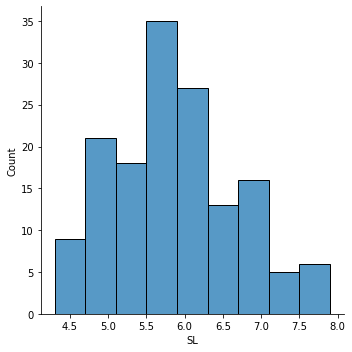

In [26]:
sns.displot(data['SL'])
plt.show()

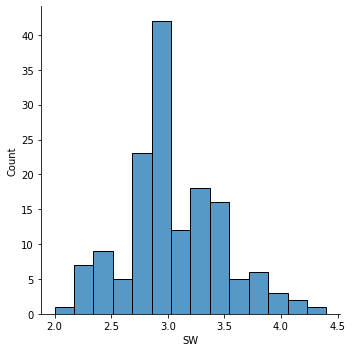

In [27]:
sns.displot(data['SW'])
plt.show()

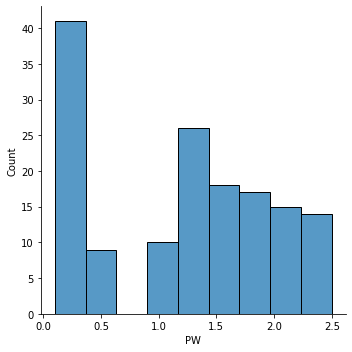

In [28]:
sns.displot(data['PW'])
plt.show()

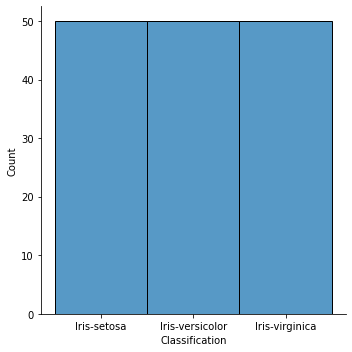

In [29]:
sns.displot(data['Classification'])
plt.show()

In [ ]:
#No outliers are present 

In [ ]:
#Assign independent and dependent variables and split into train and test data

In [34]:
X=data.drop("Classification",axis=1)
y=data["Classification"]

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=143)

In [19]:
#Encoding using one hot encoding method

In [20]:
data1=pd.get_dummies(data)

In [21]:
data1.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [23]:
#Preprocessing is done and filled all the missing values and made data ready to be inputted to a model

# 3. Find out which classification model gives the best result (also do random forest algorithm)

Logistic Regression Model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [74]:
#building logistic model
lr=LogisticRegression()
lr=lr.fit(X_train,y_train)
y_lr=lr.predict(X_test)
print(y_lr)
print("Accuracy of Logistic regression model is",accuracy_score(y_test,y_lr))

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']
Accuracy of Logistic regression model is 0.9


C:\Users\Reshma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# OUTPUT: Accuracy of Logistic regression model is 0.9

KNN model

In [75]:
from sklearn.neighbors import KNeighborsClassifier
#finding the modt accurate k value
k_met=[]
neighbors=range(3,15)
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn=knn.fit(X_train,y_train)
    knn_y=knn.predict(X_test)
    acc=accuracy_score(y_test,knn_y)
    k_met.append(acc)


In [61]:
k_met

[0.9,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9333333333333333]

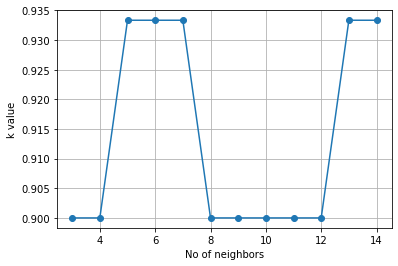

In [62]:
plt.plot(neighbors,k_met,"o-")
plt.xlabel("No of neighbors")
plt.ylabel("k value")
plt.grid()

In [63]:
#Hence take most accurate K value as 13

In [64]:
#KNN model with k value =13

In [76]:
#Building knn model
knn1=KNeighborsClassifier(n_neighbors=13)
knn1=knn1.fit(X_train,y_train)
y_knn1=knn1.predict(X_test)
print(y_knn1)
print("Accurancy of KNN model is",accuracy_score(y_test,y_knn1))

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']
Accurancy of KNN model is 0.9333333333333333


# OUTPUT: Accurancy of KNN model is 0.9333333333333333

Comparing Logistic and KNN model, we get highest accuracy for KNN model with k value=13

Random forest algorithm

In [77]:
#Building random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5)
rf=rf.fit(X_train,y_train)
y_rf=rf.predict(X_test)
print(y_rf)
print("Accuracy of Random Forest model is",accuracy_score(y_test,y_rf))

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']
Accuracy of Random Forest model is 0.9333333333333333


# Accuracy of Random Forest model is 0.9333333333333333 , which is same as KNN model but higher than Logistic regression model

Hence for predicting the classification of IRIS dataset the best model can be either KNN or Random Forest, since both are having the same highest accuracy